# Dataset Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [2]:
# import visualization tools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# books.drop(['imageUrlM', 'imageUrlS', 'imageUrlL'],axis=1,inplace=True)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
pd.set_option('display.max_colwidth', -1)

In [9]:
books.yearOfPublication.unique()
books.loc[books.yearOfPublication == 'DK Publication Inc',:]
books.loc[books.yearOfPublication == 'Gallimard',:]
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

In [43]:
books.loc[(books.yearOfPublication>2006) | (books.yearOfPublication == 0), 'yearOfPublication'] = np.NAN

In [12]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [17]:
#publisher column
books.loc[books.publisher.isnull(), :]
#age
#print(sorted(users.Age.values.uniqe()))
users.loc[(users.Age>90)|(users.Age<5), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [19]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


In [20]:
sparsity = 1.0 - len(ratings_new)/float(users.shape[0] * books.shape[0] )
print("sparsity of bookcrossing dataset is {}%".format(sparsity*100))

sparsity of bookcrossing dataset is 99.99863734155898%


In [21]:
ratings.bookRating.unique()
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

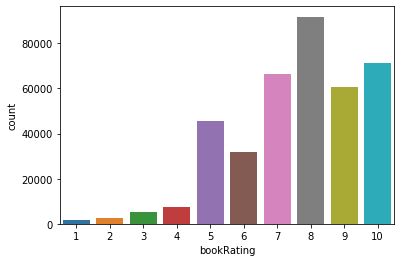

In [23]:
sns.countplot(data=ratings_explicit, x='bookRating')
plt.show()

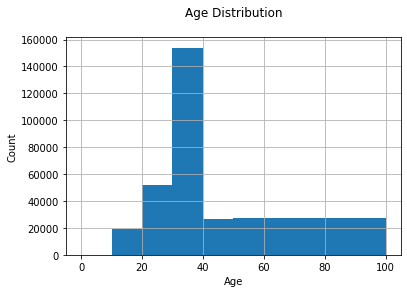

In [41]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()